<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 3*

---

# Regularized Regression

## 🏆 학습목표
1. 정규화 회귀모델(regularized regression)을 이해합니다.
    - Ridge / Lasso 회귀모델의 차이를 이해합니다.
2. scikit-learn을 이용해 정규화 모델을 만들어 사용하고 해석할 수 있습니다.

### Warm up
#### 다음 영상을 시청하세요.
- [StatQuest video on Ridge Regression:](https://youtu.be/Q81RR3yKn30?t=222)
    - ridge regression을 통해서 bias를 약간 높이게 되면 어떤 효과를 얻게 되나요?
    - 람다(패널티) 값을 크게 잡으면 어떤 효과가 있나요?
<br></br>

- [StatQuest video on Lasso Regression:](https://www.youtube.com/watch?v=NGf0voTMlcs)
    - ridge regression과 lasso regression의 차이는 무엇인가요?

### 📚 아래 라이브러리를 설치해 주세요.
#### 이번 모듈에서 추가적으로 사용하는 라이브러리는 다음과 같습니다. 설치를 확인해 주세요.
- [**category_encoders**](https://contrib.scikit-learn.org/category_encoders/)

In [ ]:
# 원핫인코딩을 위해 category_encoders 라이브러리를 설치해줍니다.
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 6.0 MB/s eta 0:00:00


---


## 과적합을 어떻게 방지할 수 있을까요? 
- 과적합이 된 모델은 새로운 데이터에 대해 정확하게 예측하지 못합니다. 따라서 과적합을 예방하고 일반화 된 모델을 만드는 것이 중요합니다.
- 너무 복잡한 모델은 학습 데이터의 노이즈까지 과하게 학습하여 과적합을 일으킨다고 배웠습니다.
- 따라서 모델의 복잡도를 줄이는 방법을 통해 과적합을 예방할 수 있을 것입니다.

1. 더 많은 데이터를 학습시킵니다.
    - 모델의 복잡도는 데이터의 크기에 따라 판단합니다. 
        - 같은 문제라 해도 데이터가 더 많으면 더 복잡한 모델을 사용할 수 있습니다.
    - 데이터가 부족한 상태에서 과적합이 일어났다면 더 많은 데이터를 학습시켜 적절한 수준의 복잡도를 가진 모델이 될 수 있습니다.
    - 같은 맥락으로 Cross-Validation을 사용할 수 있습니다.
        - 교차검증은 훈련 데이터셋을 여러 개의 학습 및 검증 데이터 세트으로 분할하여 여러 데이터셋을 학습하고 검증합니다.
        - 이 과정을 통해 특정 데이터셋에 과적합되지 않고 보다 일반화 된 모델을 만들 수 있습니다.
<br></br>

2. 모든 특성을 사용하지 않습니다.
    - 너무 많은 특성은 모델을 복잡하게 만듭니다.
    - 모델의 성능에 영향을 많이 미치지 않는 특성을 삭제하여 모델을 더 단순화하면 과적합을 방지할 수 있습니다.
<br></br>

3. 정규화 모델 
    - 모델에 규제항을 더해 기존 모델보다 단순하게 만듭니다.
    - 규제항은 회귀계수 값이 너무 커지는 것을 방지하여 과적합을 예방할 수 있습니다.


## 정규화 회귀모델
- 정규화 회귀모델은 선형모델에 규제항을 더해 과적합을 방지하는 방법입니다.
- 규제항은 회귀계수를 감소시켜 예측에 미치는 영향력을 축소시킵니다. $\rightarrow$ 선형모델이 학습데이터에 덜 적합하게 만들고 일반화 성능을 높이는 역할을 합니다.
    - 즉, 덜 학습시켜서 일반화 성능 up
- 분산과 편향 트레이드오프 관점에서 설명하면 정규화란 모델에 편향을 조금 더하고 분산을 줄여서 더 일반화된 모델을 만드는 기법입니다.
- 규제항의 종류에 따라 Ridge, Lasso, ElasticNet으로 구분됩니다.
    - `Ridge` : L2 Penalty(가중치들의 제곱합)
    - `Lasso` : L1 Penalty(가중치들의 절댓값 합)
    - `ElasticNet` : L1 Penalty(가중치들의 절댓값 합) + L2 Penalty(가중치들의 제곱합)
- Regularized Regression은 입력 특성의 스케일에 민감하기 때문에 반드시 특성의 스케일을 표준화하는 작업이 필요합니다.

### Ridge Regression

- Ridge Regression은 회귀계수에 `가중치들의 제곱합(L2 penalty)`을 패널티로 부과하여 회귀계수의 크기를 줄이는 모델입니다.
- L2 패널티를 적용하면 영향력이 크지 않은 회귀계수의 값은 0에 가까운 수로 축소합니다.
- Ridge Regression의 비용함수는 다음과 같습니다.

$$ cost = RSS + \lambda\sum_{j=1}^p\beta_j^2 = \sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1}-\dotsc-\beta_px_{ip})^2 + \lambda\sum_{j=1}^p\beta_j^2 $$



In [ ]:
# RSS: ols 의 비용함수

### Lasso Regression

- Lasso Regression은 회귀계수에 `가중치들의 절대값의 합(L1 penalty)`을 패널티로 부과하여 회귀계수의 크기를 줄이는 모델입니다.
- Lasso의 중요한 특징은 영향력이 크지 않은 회귀계수의 값을 0으로 만든다는 것입니다.
    - 그 결과 자동으로 특성을 선택하는 효과를 가지게 되며 희소모델(sparse model)을 만들게 됩니다. 
    - 희소 모델이란 가중치가 0인 특성이 많은 모델을 말합니다.
- Lasso Regression의 비용함수는 다음과 같습니다.

$$ cost = RSS + \lambda\sum_{j=1}^p\vert\beta_j\vert = \sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1}-\dotsc-\beta_px_{ip})^2 + \lambda\sum_{j=1}^p\vert\beta_j\vert $$

### $\lambda$ (Lambda)
- $\lambda$ 는 패널티의 강도를 조절하는 하이퍼파라미터입니다. lambda, alpha, penalty term, regularization term 등으로 불립니다.
- $\lambda$ 의 크기가 클수록 회귀계수를 규제하는 강도가 강해져 회귀계수의 값이 줄어듭니다. 
    - $\lambda = 0$ 인 경우 기존의 선형회귀와 같아집니다.
    - $\lambda = \infty $ 인 경우  $\beta = 0$ 에 근사한 값이 됩니다.(y_hat=$\beta_0$)


- 빨간색 등고선은 비용함수(RSS)를 의미하고 하늘색 음영은 각 회귀계수가 규제에 따라 움직일 수 있는 범위(제약)공간입니다.
- 첫번째 그래프는 회귀계수가 2개인 선형회귀에 L1 패널티를 적용한 Lasso regression입니다. 
    - L1 패널티는 회귀계수의 절대값이기 때문에 회귀계수가 움직일 수 있는 공간이 마름모꼴의 형태로 나타납니다.
- 두번째 그래프는 L2 패널티를 적용한 Ridge regression입니다. 
    - L2 패널티는 회귀계수의 제곱이기 때문에 회귀계수가 움직일 수 있는 공간이 원형의 형태로 나타납니다.
- 제약 공간 안에서 RSS 등고선과 만나는 지점이 비용함수가 최소가 되는 지점입니다.
    - Lasso regression은 영향력이 작은 회귀계수의 값이 0이 되고 Ridge regression의 경우 0에 가까운 수로 축소하는 것을 알 수 있습니다.

<img src="https://user-images.githubusercontent.com/31824102/35559426-a88e3f02-05a2-11e8-9d7d-8af8ce422077.PNG" width="50%">

ElasticNet은 L1 패널티와 L2 패널티를 모두 사용하는 정규화모델입니다. 이와 관련해서는 아래 참고자료를 통해 더 공부해보세요.  
[Wiki : Elastic net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization)  
[sciket learn : Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)  


### OLS vs Ridge vs Lasso

이제 OLS와 Ridge Regression, Lasso Regression을 그래프를 그려보며 비교해 봅시다.

간단히 사용할 데이터는 — [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), dataset III 입니다

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ans.plot.scatter('x', 'y');

#### 결과를 비교하기에 앞서 사용법 숙지를 위해 ridge regression과 lasso regression을 scikit learn으로 구현해보겠습니다.  

Ridge와 Lasso 사용법은 아래 scikit learn 공식 문서를 확인해보시기 바랍니다.

[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)  
[sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso)


##### ridge regression 구현

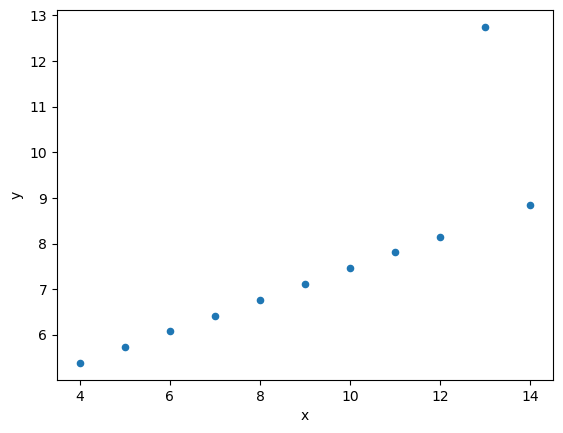

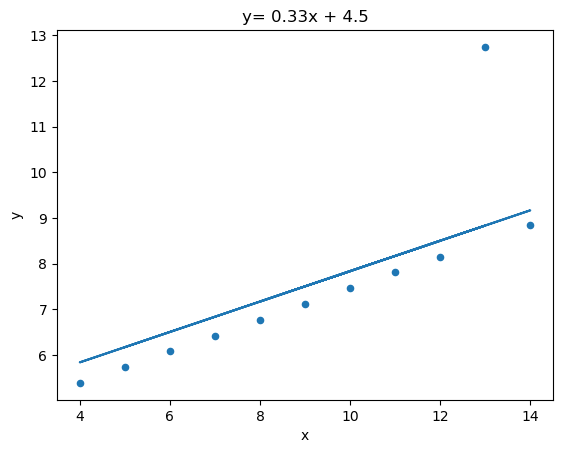

In [ ]:
# ridge regression 구현
# ridge = Ridge(alpha=0.5, normalize=True) # alpha : 패널티 강도, normalize : 표준화 작업
ridge = Ridge(alpha=0.5) # normalize parameter 
ridge.fit(ans[['x']], ans['y']) # 학습하고
y_pred_ridge = ridge.predict(ans[['x']]) # 예측한다.

# 그래프 그리기
ans.plot.scatter('x', 'y')
plt.plot(ans['x'], y_pred_ridge)
plt.title(f'y= {ridge.coef_[0].round(2)}x + {ridge.intercept_.round(2)}')

plt.show()


##### lasso regression 구현

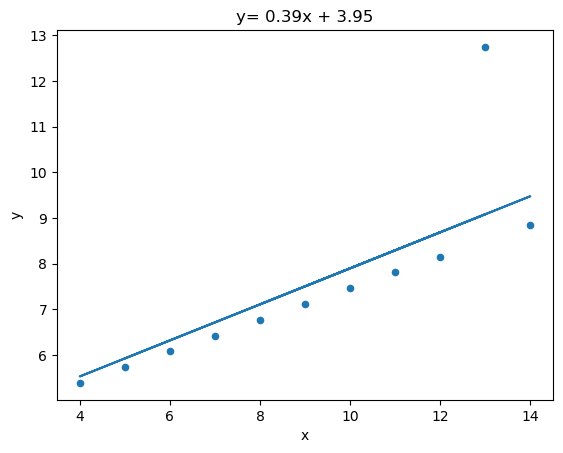

In [ ]:
# lasso regression 구현
lasso = Lasso(alpha=0.1, normalize=True) # alpha : 패널티, normalize : 표준화 작업
lasso.fit(ans[['x']], ans['y'])
y_pred_lasso = lasso.predict(ans[['x']])


# 그래프 그리기
ans.plot.scatter('x', 'y')
plt.plot(ans['x'], y_pred_lasso)
plt.title(f'y= {lasso.coef_[0].round(2)}x + {lasso.intercept_.round(2)}')
plt.show()

#### 단순선형회귀(OLS)  vs Ridge vs Lasso

In [ ]:
# 그래프를 그리기 위한 함수
def predict_ypred(alpha, model) : 
    ml = model(alpha=alpha, normalize=True)
    ml.fit(ans[['x']], ans['y'])
    m = ml.coef_[0].round(2)
    b = ml.intercept_.round(2)
    formula = f'y = {m}x + {b}'
    ans['y_pred'] = ml.predict(ans[['x']])
    return ans['y_pred'], formula


def plotting(model, alphas, ax, title, legend) :
    colors = ['blue', 'red','orange', 'green']
    for alpha, color in zip(alphas, colors):
        ans['y_pred'], formula = predict_ypred(alpha, model)
        ans.plot('x', 'y_pred', ax=ax, color =color, linestyle='dashed', alpha=0.5)
        ax.text(14, ans.loc[27, 'y_pred'], formula)
    ax.set_title(title)
    ax.legend(legend)

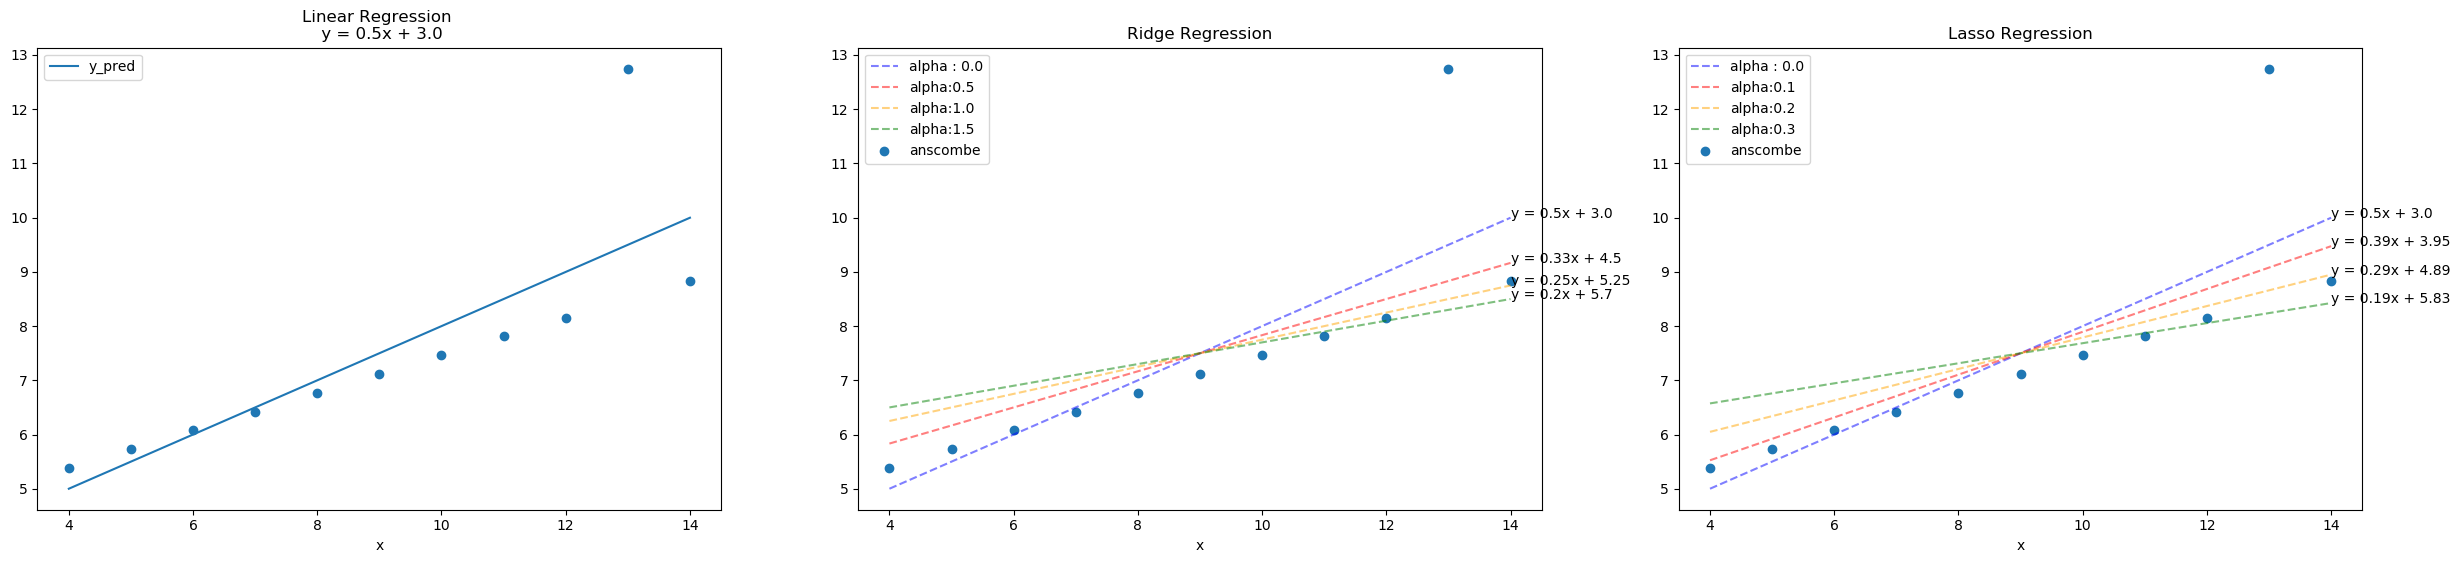

In [ ]:
%matplotlib inline
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ans = ans.sort_values(by='x')

fig = plt.figure(figsize=(30, 6))
ax = fig.add_subplot(131)
ax.scatter(ans['x'], ans['y'])

"""
OLS
"""
ols = LinearRegression()
ols.fit(ans[['x']], ans['y'])

# 회귀계수와 intercept를 확인합니다.
m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

# 훈련 데이터로 예측을 합니다.
ans['y_pred'] = ols.predict(ans[['x']])
ans.plot('x', 'y_pred', ax=ax, title=title);

"""
Ridge Regression
"""
ax1 = fig.add_subplot(132)
ax1.scatter(ans['x'], ans['y'])

alphas = np.arange(0, 2, 0.5)
title = 'Ridge Regression'
legend = ['alpha : 0.0', 'alpha:0.5', 'alpha:1.0', 'alpha:1.5','anscombe']
plotting(Ridge, alphas, ax1, title, legend)

"""
Lasso Regression
"""
ax2 = fig.add_subplot(133)
ax2.scatter(ans['x'], ans['y'])

alphas = np.arange(0, 0.4, 0.1)
title = 'Lasso Regression'
legend = ['alpha : 0.0', 'alpha:0.1', 'alpha:0.2', 'alpha:0.3','anscombe']
plotting(Lasso, alphas, ax2, title, legend)

plt.show()


##### 그래프를 보면, 
- alpha = 0인 경우에는 Ridge와 Lasso 모두 OLS 와 같은 그래프 형태로 같은 모델임을 확인 할 수 있고.
- alpha 값이 커질 수록 직선의 기울기가 0에 가까워지는 것을 알 수 있습니다.
- 정규화모델은 OLS 모델에 비해 이상치에 영향을 덜 받는 것을 알 수 있습니다.

#### 다항선형회귀(OLS) vs Ridge vs Lasso

In [ ]:
# 그래프를 그리기 위한 함수
def predict_poly_ypred(alpha, model) : 
    ml = model(alpha=alpha, normalize=True)
    ml.fit(ans[['x']], ans['y'])
    ans['y_pred'] = ml.predict(ans[['x']])
    return ans['y_pred']

def plotting(model, alphas, ax, title, legend, colors) :
    for alpha, color in zip(alphas, colors):
        ans['y_pred']= predict_poly_ypred(alpha, model)
        ans.plot('x', 'y_pred', ax=ax, color =color, linestyle='dashed', alpha=0.5)
    ax.set_title(title)
    ax.legend(legend)

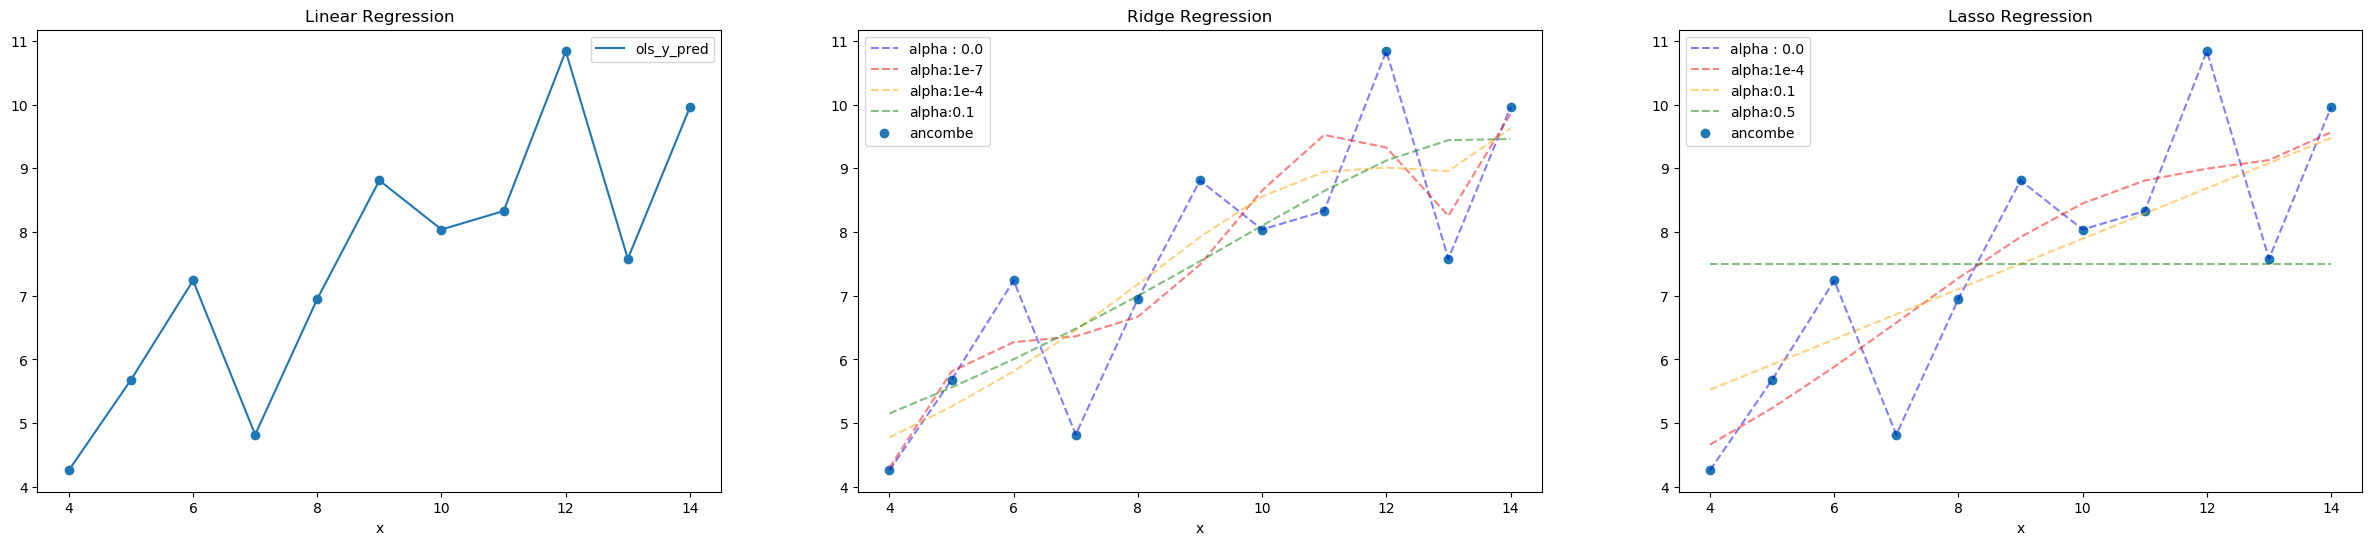

In [ ]:
%matplotlib inline
from sklearn.pipeline import make_pipeline
ans = sns.load_dataset('anscombe').query('dataset=="I"').sort_values(by='x')

fig = plt.figure(figsize=(30, 6))
ax = fig.add_subplot(131)
ax.scatter(ans['x'], ans['y'])

"""
OLS
"""
def PolynomialRegression(degree=10, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        StandardScaler(),
                         LinearRegression(**kwargs))
ols = PolynomialRegression()
ols.fit(ans[['x']], ans['y'])
title = f'Linear Regression'

# 훈련 데이터로 예측을 합니다.
ans['ols_y_pred'] = ols.predict(ans[['x']])
ans.plot('x', 'ols_y_pred', ax=ax, title=title);

"""
Ridge Regression
"""
ax1 = fig.add_subplot(132)
ax1.scatter(ans['x'], ans['y'])

def PolynomialRidge(degree=10, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))

colors = ['blue', 'red','orange', 'green']
alphas =[0, 0.0000001, 0.0001, 0.1]
title = 'Ridge Regression'
legend = ['alpha : 0.0', 'alpha:1e-7', 'alpha:1e-4', 'alpha:0.1','anscombe']
plotting(PolynomialRidge, alphas, ax1, title, legend, colors)

"""
Lasso Regression
"""

ax2 = fig.add_subplot(133)
ax2.scatter(ans['x'], ans['y'])

def PolynomialLasso(degree=10, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Lasso(**kwargs))

ans.plot('x', 'ols_y_pred', ax=ax2, color = 'blue', linestyle='dashed', alpha=0.5)
alphas =[0.0001, 0.1, 0.5]
colors = ['red','orange', 'green']
title = 'Lasso Regression'
legend = ['alpha : 0.0', 'alpha:1e-4', 'alpha:0.1', 'alpha:0.5','anscombe']
plotting(PolynomialLasso, alphas, ax2, title, legend, colors)
plt.show()

##### 다항선형회귀 그래프를 보면
- Ridge Regression의 경우 alpha값이 커질수록 다항회귀식이 점점 완만한 곡선을 그리는 것을 확인할 수 있습니다.
- Lasso Regression의 경우에도 alpha 값이 커질수록 완만한 곡선을 그리고 alpha=0.5인 경우에는 거의 평균에 회귀하는 것을 볼 수 있습니다.
<br></br>

##### 다항선형회귀의 회귀계수를 확인해보겠습니다.

In [ ]:
# ols 회귀계수
ols_coef = ols.named_steps['linearregression'].coef_

# Ridge 회귀계수
def PolynomialRidge(degree=10, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))
ridge = PolynomialRidge(alpha = 0.0000001, normalize=True)
ridge.fit(ans[['x']], ans['y'])
ridge_coef = ridge.named_steps['ridge'].coef_

# Lasso 회귀계수
def PolynomialLasso(degree=10, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Lasso(**kwargs))

lasso = PolynomialLasso(alpha = 0.1, normalize=True)
lasso.fit(ans[['x']], ans['y'])
lasso_coef = lasso.named_steps['lasso'].coef_

In [ ]:
coef_comparison = pd.DataFrame(index = [1, 'x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', 'x^8', 'x^9', 'x^10'], 
                            data = {'OLS':ols_coef,'Ridge':ridge_coef, 'Lasso' :lasso_coef})

               OLS         Ridge    Lasso
1     0.000000e+00  0.000000e+00  0.00000
x    -1.624479e+05  1.260504e+01  0.39521
x^2   1.565836e+06 -1.574863e+00  0.00000
x^3  -7.151280e+06  2.588935e-02  0.00000
x^4   1.992343e+07  3.033886e-03  0.00000
x^5  -3.680008e+07  1.551800e-04  0.00000
x^6   4.632476e+07  1.123758e-05  0.00000
x^7  -3.954013e+07 -7.939654e-08  0.00000
x^8   2.200458e+07 -1.606226e-07  0.00000
x^9  -7.233824e+06 -1.540994e-08  0.00000
x^10  1.069166e+06  1.292074e-09  0.00000


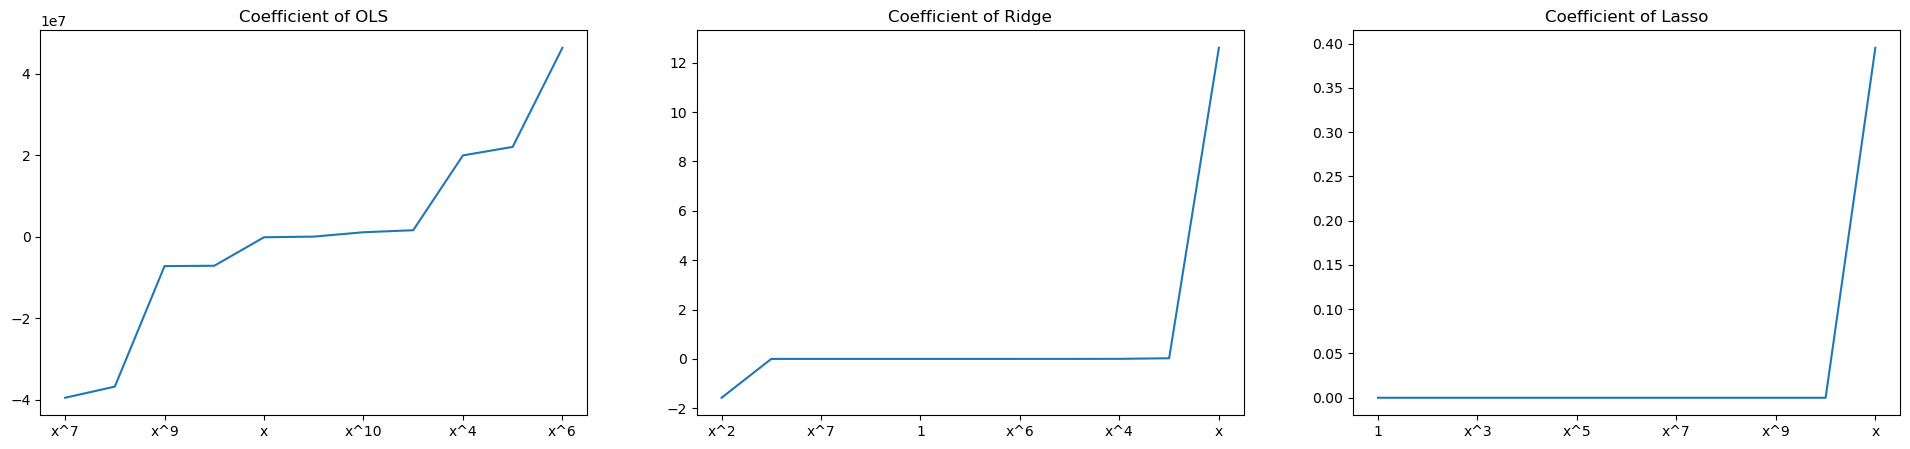

In [ ]:
print(coef_comparison)

fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(131)
coef_comparison.OLS.sort_values().plot(ax=ax)
ax.set_title('Coefficient of OLS')

ax1 = fig.add_subplot(132)
coef_comparison.Ridge.sort_values().plot(ax=ax1)
ax1.set_title('Coefficient of Ridge')

ax2 = fig.add_subplot(133)
coef_comparison.Lasso.sort_values().plot(ax=ax2)
ax2.set_title('Coefficient of Lasso')

plt.show()

In [ ]:
# 첫번째줄 1이나오는 이유는 x^0 도 있기때문

##### 회귀계수를 살펴보면
- Ridge regression의 경우 회귀계수가 0에 가깝게 줄어들지만 0은 아닌 것을 알 수 있습니다.
- 반면 Lasso regression의 경우 회귀계수가 중요한 하나의 특성을 제외하고 모두 0에 수렴하는 것을 확인할 수 있습니다.
    - 이처럼 Lasso regression은 많은 특성의 가중치(회귀계수)가 0인 희소모델을 만듭니다.


## 🏡 Case Study : Predicting House Price

- House Price 데이터를 이용해 과적합을 방지하는 다양한 방법을 비교해보도록 하겠습니다.
    - OLS
    - Feature Selection
    - Ridge Regression
    - Lasso Regression
- 이번 노트에서는 모든 컬럼을 사용해서 모델을 만들어보겠습니다.
<br></br>

데이터에 대한 더 구체적인 설명은 링크를 참고해주세요.
["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

### EDA

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

In [ ]:
# 데이터를 확인해보겠습니다. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# 중복되는 값이 있는지 확인합니다.
df.duplicated().sum()

0

In [ ]:
# 결측치를 확인합니다.
df.isna().sum()[df.isna().sum() !=0]/len(df)

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [ ]:
# 결측치가 80%가 넘는 컬럼도 삭제해주겠습니다.
cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(cols, axis=1, inplace=True)

In [ ]:
# 고유한 값이 너무 많은 컬럼도 예측에 도움이 되지 않으니 확인하고 삭제해주겠습니다. 
df.nunique()[df.nunique()/len(df)>0.7]

Id         1460
LotArea    1073
dtype: int64

In [ ]:
cols = ['Id', 'LotArea']
df.drop(cols, axis=1, inplace=True)

In [ ]:
print(df.shape)
df.head()

(1460, 75)


,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


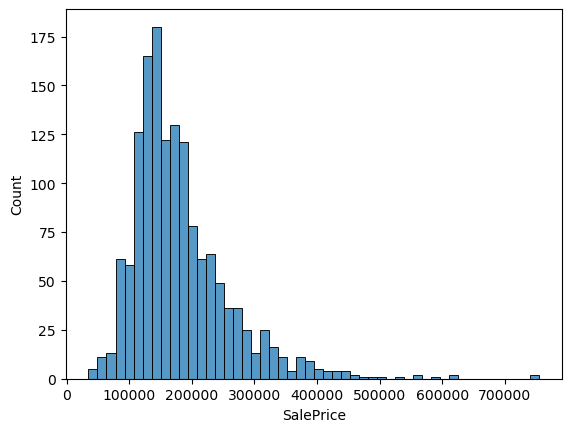

In [ ]:
# 타겟의 분포를 확인해보겠습니다.

sns.histplot(df['SalePrice'], bins=50);

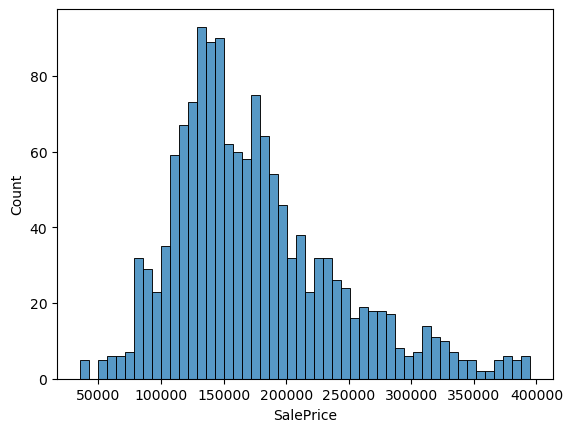

In [ ]:
# 왼쪽으로 치우쳐진 분포입니다. 주택 판매 가격이 400000을 넘지 않는 샘플만 다시 추출하도록 하겠습니다.
df = df[df['SalePrice']<400000]
sns.histplot(df['SalePrice'], bins=50);

In [ ]:
# 수치형 컬럼과 타겟간의 상관관계를 확인해보겠습니다. 상관관계가 높은 상위 10개 컬럼만 보도록하겠습니다. 
# target = SalePrice

df.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.794784
GrLivArea       0.663579
GarageCars      0.646759
GarageArea      0.624492
TotalBsmtSF     0.575020
1stFlrSF        0.564498
YearBuilt       0.558338
FullBath        0.556311
YearRemodAdd    0.538547
Name: SalePrice, dtype: float64

In [ ]:
# 시간과 관련된 데이터는 YearBuilt와 YearRemodAdd를 이용하여 새로운 특성을 만든 후 삭제하도록 하겠습니다.
# 가장 최근 데이터가 2010년이기 때문에 2011년 기준으로 차이를 구해보겠습니다.

df['YearBuilt_delta'] = 2011 - df['YearBuilt']
df['YearRemodAdd_delta'] = 2011 - df['YearRemodAdd']

df.drop(['MoSold', 'YrSold','YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

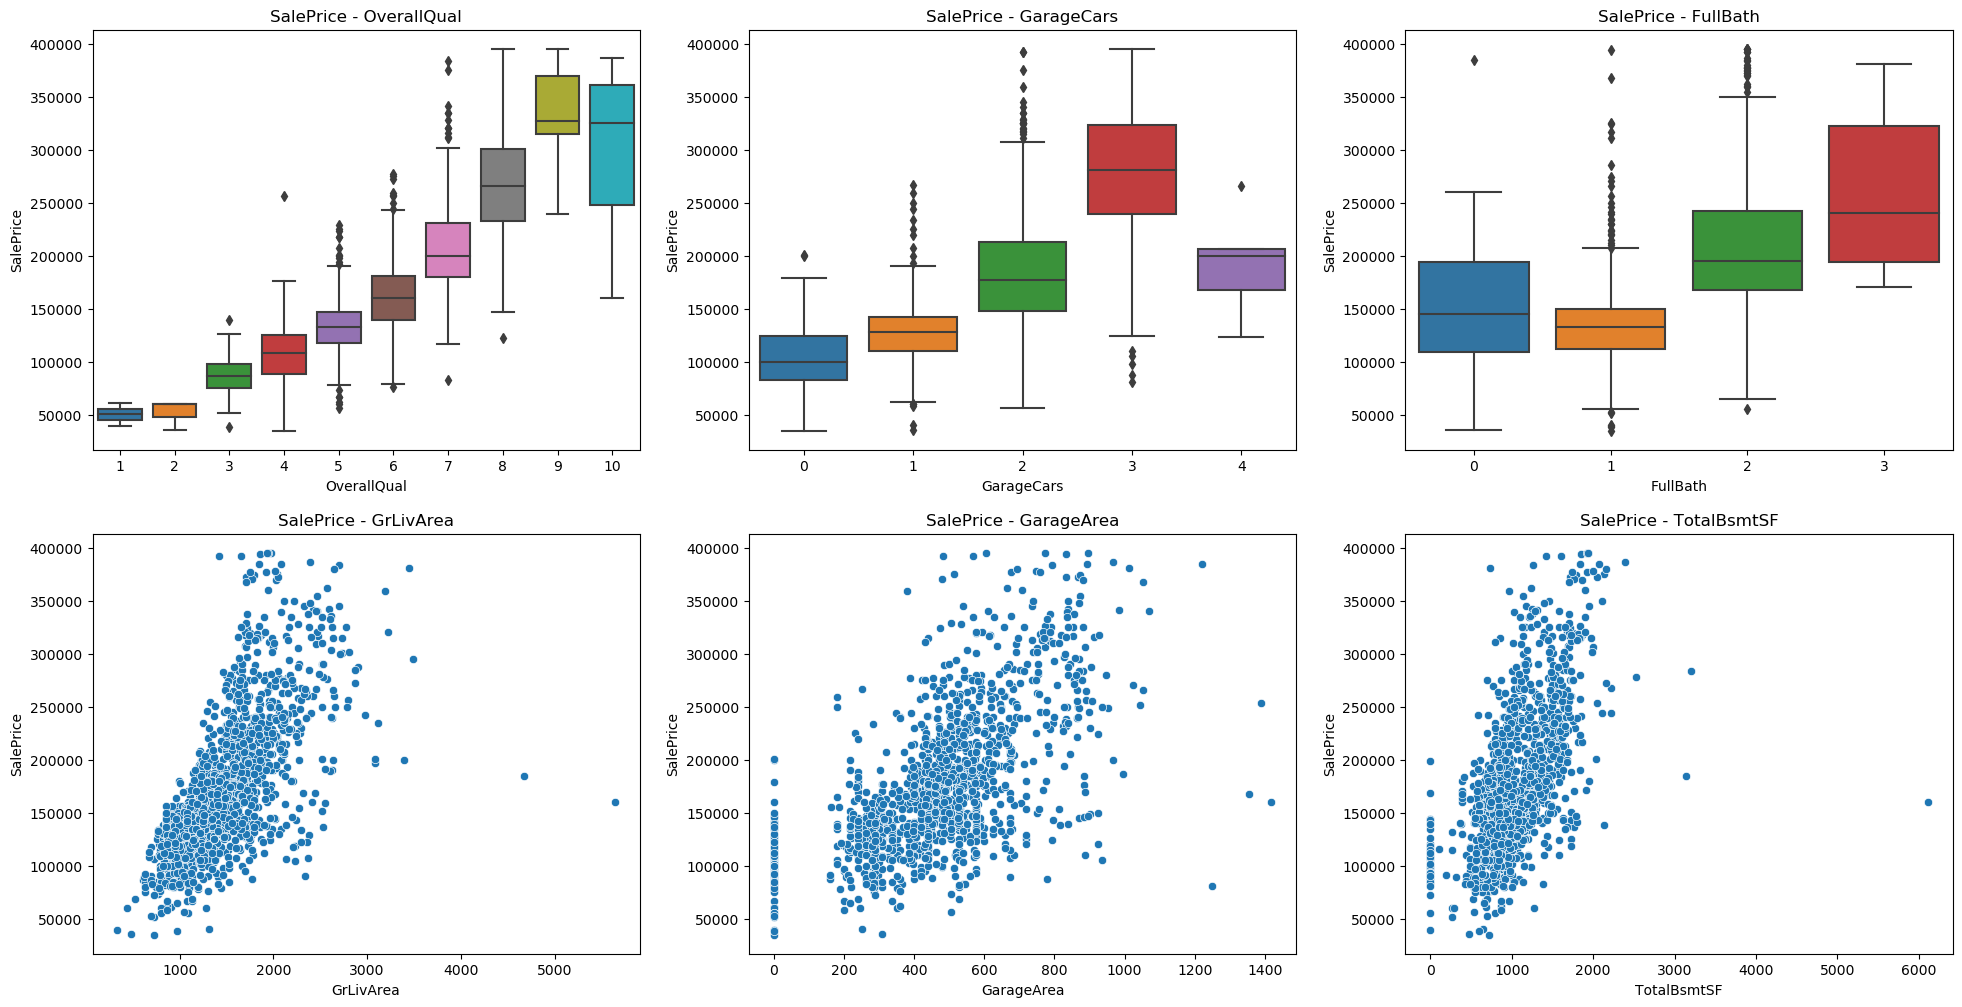

In [ ]:
"""
상관관계가 높은 컬럼 중 범주형 컬럼과 타겟의 관계 및 수치형 컬럼과 타겟의 관계를 시각화해보겠습니다.

범주형 컬럼 
1. OverallQual : 전반적인 퀄리티 (1-10)
2. GarageCars : 주차장에 주차할 수 있는 차의 수(0-4)
3. FullBath : 욕실의 수(0-3)

수치형 컬럼
1. GrLivArea : 집의 크기
2. GarageArea : 주차장의 크기
3. TotalBsmtSF : 지하실의 크기
"""

# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(24, 12)
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(nrows=2, ncols=3)
sns.boxplot(data=df, x='OverallQual', y='SalePrice', ax=ax1)
ax1.set_title('SalePrice - OverallQual')
sns.boxplot(data=df, x='GarageCars', y='SalePrice', ax=ax2)
ax2.set_title('SalePrice - GarageCars')
sns.boxplot(data=df, x='FullBath', y='SalePrice', ax=ax3)
ax3.set_title('SalePrice - FullBath')

# 수치형 컬럼과 타겟과의 관계
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', ax=ax4)
ax4.set_title('SalePrice - GrLivArea')
sns.scatterplot(data=df, x='GarageArea', y='SalePrice', ax=ax5)
ax5.set_title('SalePrice - GarageArea')
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice', ax=ax6)
ax6.set_title('SalePrice - TotalBsmtSF')

plt.show()


### Modeling

In [ ]:
# train, test 데이터를 나눠주겠습니다. 

from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train, test 데이터가 잘 나눠졌는지 확인해봅니다.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1145, 72), (287, 72), (1145,), (287,))

#### Preprocessing : Scaling & Encoding

모델을 만들기에 앞서 몇 가지 전처리 작업이 필요합니다. 전처리에 관한 더 자세한 내용은 sprint2에서 다룰 예정입니다. 이번 노트에서는 모델링에 필요한 두 가지 전처리만 간단하게 보도록하겠습니다. 

1. Scaling
    - 위에서 언급한 것처럼 정규화 모델은 특성의 스케일을 표준화하는 것이 필요합니다.
    - 이를 위해 StandardScaler를 사용하도록 하겠습니다.

2. Encoding
    - 문자열로 된 범주형 변수는 모델이 인식하지 못합니다. 따라서 수치형 변수로 변환해줘야 합니다.
    - 순서가 없는 범주형 변수(명목형 변수)는 One-Hot Encoding을 사용합니다. 
    - One Hot Encoding은 n개의 범주를 가진 범주형 특성을 n개의 이진 특성(0과 1)으로 변환해줍니다. 
        - n개의 범주를 가진 하나의 특성을 OneHotEncoding한 이후에는 n개의 새로운 특성이 생기게됩니다. 
        - 따라서 범주가 너무 많은 경우(high cardinality)에는 적절한 인코딩 방법이 아닙니다.


In [ ]:
# 결측치를 먼저 평균으로 모두 채워주겠습니다. 

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [ ]:
# 수치형 변수만 스케일링을 해주도록 하겠습니다.

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats]) # fit 후에 transform
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats]) # 위에서 정해진 규칙대로 transform?

In [ ]:
# 수치형 컬럼이 모두 평균 = 0(에 가까운 수), 표준편차 = 1(에 가까운 수)로 변환된 것을 확인할 수 있습니다.

X_train[numeric_feats].describe().T[['mean', 'std']]

In [ ]:
# One-Hot encoding을 해주겠습니다.
from category_encoders import OneHotEncoder

ohe = OneHotEncoder()

# 인코딩하는 방법을 눈여겨 보세요.

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

In [ ]:
# 문자형 데이터가 없는 것을 확인할 수 있습니다.
(X_train_ohe.dtypes == 'object').sum()

0

One Hot Encoding 이후 특성이 어떻게 변했는지 확인해보겠습니다.

In [ ]:
X_train['MSZoning'].unique()

array(['RL', 'FV', 'RH', 'RM', 'C (all)'], dtype=object)

In [ ]:
X_train['MSZoning'].head(3)

1165    RL
31      RL
214     RL
Name: MSZoning, dtype: object

In [ ]:
mszoning_cols = [x for x in X_train_ohe.columns if 'MSZoning' in x]
X_train_ohe[mszoning_cols].head(3)

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5
1165,1,0,0,0,0
31,1,0,0,0,0
214,1,0,0,0,0


MSZoning 특성을 살펴보면 
- 기존에는 `MSZoning`이었는데
- 원핫인코딩 이후 `MSZoning_1`,	`MSZoning_2`, `MSZoning_3`, `MSZoning_4`, `MSZoning_5` 으로 변환된 것을 확인할 수 있습니다.
<br></br>

범주형 특성이 어떻게 변환이 되었는지는 `.category_mapping` 메소드를 사용해서 확인할 수 있습니다.

In [ ]:
ohe.category_mapping

[{'col': 'MSZoning',
  'mapping': RL         1
  FV         2
  RH         3
  RM         4
  C (all)    5
  NaN       -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'Street',
  'mapping': Pave    1
  Grvl    2
  NaN    -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'LotShape',
  'mapping': IR1    1
  Reg    2
  IR2    3
  IR3    4
  NaN   -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'LandContour',
  'mapping': Lvl    1
  Low    2
  Bnk    3
  HLS    4
  NaN   -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'Utilities',
  'mapping': AllPub    1
  NoSeWa    2
  NaN      -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'LotConfig',
  'mapping': Inside     1
  CulDSac    2
  FR2        3
  Corner     4
  FR3        5
  NaN       -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'LandSlope',
  'mapping': Gtl    1
  Mod    2
  Sev    3
  NaN   -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'Neighborhood',
  'mapping': NridgHt     1


In [ ]:
X_train_ohe.shape

(1145, 282)

One-Hot Encoding 후 데이터는 1145개의 샘플과 282개의 컬럼으로 구성되어 있는 것을 확인할 수 있습니다.
- 데이터 사이즈에 비해 컬럼의 수가 매우 많습니다.
- 이런 경우에는 과적합이 발생할 수 있습니다. 

다중선형회귀를 만들어 실제 과적합이 발생하는지 확인해보도록 하겠습니다.

#### 기준모델
먼저 평균을 이용해 기준모델을 만들어보겠습니다.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 51072.83653172136


#### 다중선형회귀(OLS)

In [ ]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3)
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

In [ ]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train_ohe, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols,X_train_ohe, y_train, X_test_ohe, y_test)

학습 세트 r2_score : 0.929
검증 세트 r2_score : -7.764611579440798e+19
테스트 세트 r2_score : -8.266405490575e+17


- 학습 세트에서 성능(결정계수)이 0.929가 나온 것에 비해 검증 세트와 테스트 세트의 성능은 0에 가까운 수가 나왔습니다. 학습 세트에 과적합된 상태인 것을 알 수 있습니다.

In [ ]:
ols_coef = pd.Series(ols.coef_, X_train_ohe.columns)
ols_coef.sort_values(ascending=False).head(20)

Street_1         2.064383e+16
Street_2         2.064383e+16
GrLivArea        1.568827e+16
MSZoning_2       1.294755e+16
MSZoning_1       1.294755e+16
MSZoning_3       1.294755e+16
MSZoning_4       1.294755e+16
MSZoning_5       1.294755e+16
LandContour_4    6.905556e+15
LandContour_1    6.905556e+15
LandContour_2    6.905556e+15
LandContour_3    6.905556e+15
BsmtFinSF1       3.720293e+15
BsmtUnfSF        3.577507e+15
BldgType_2       3.062704e+15
BldgType_1       3.062704e+15
BldgType_3       3.062704e+15
BldgType_4       3.062704e+15
BldgType_5       3.062704e+15
FireplaceQu_6    2.812711e+15
dtype: float64

#### OLS with feature selection
- 이번에는 모든 특성을 사용하지 않고 일부만 사용해보겠습니다. 
- 어떻게 효과적으로 예측에 유용한 특성을 선택할 수 있을까요?
- 다양한 방법이 있지만 이번 노트에서는 SelectKBest를 사용해보겠습니다.

[sklearn.feature_selection.SelectKbest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest)

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 
# 총 282개 특성 중 50개만 사용하도록 하겠습니다. 

selector = SelectKBest(score_func= f_regression, k=50)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train_ohe, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test_ohe)

In [ ]:
# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

array(['MSZoning_4', 'LotFrontage', 'Neighborhood_1', 'OverallQual',
       'Exterior1st_1', 'Exterior2nd_1', 'MasVnrType_1', 'MasVnrType_2',
       'MasVnrArea', 'ExterQual_1', 'ExterQual_2', 'ExterQual_3',
       'Foundation_1', 'Foundation_2', 'BsmtQual_1', 'BsmtQual_2',
       'BsmtQual_3', 'BsmtFinType1_2', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC_1', 'HeatingQC_3', 'CentralAir_1', 'CentralAir_2',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual_1',
       'KitchenQual_2', 'KitchenQual_4', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_1', 'FireplaceQu_2', 'GarageType_1', 'GarageType_3',
       'GarageYrBlt', 'GarageFinish_2', 'GarageFinish_3', 'GarageCars',
       'GarageArea', 'GarageQual_1', 'GarageCond_1', 'GarageCond_3',
       'WoodDeckSF', 'OpenPorchSF', 'SaleType_1', 'SaleCondition_1',
       'YearBuilt_delta', 'YearRemodAdd_delta'], dtype=object)

In [ ]:
# 다중선형회귀의 회귀계수 크기가 큰 상위 50개와 selectkbest로 선택된 50개를 비교해봤을 때 총 3개의 특성이 겹칩니다.
intersection_coef = set(ols_coef.head(50).index) & set(selector.get_feature_names_out())
print(len(intersection_coef))
print(intersection_coef)

# 타겟값과 상관계수가 가장 큰 50개의 컬럼과 비교했을 때는 36개가 겹칩니다. 
# 특성들과 타겟간의 상관관계를 구하는 방법이 다르기 때문에 결과가 다르게 나옵니다.
tmp = pd.concat([X_train_ohe, y_train], axis=1).corr()['SalePrice'].sort_values(ascending=False)[1:51]
intersection_corr = set(tmp.index) & set(selector.get_feature_names_out())
print(len(intersection_corr))
print(intersection_corr)


3
{'MSZoning_4', 'LotFrontage', 'Neighborhood_1'}
36
{'Foundation_1', 'BsmtQual_1', 'KitchenQual_4', 'GarageType_1', 'BsmtFinSF1', 'ExterQual_3', 'KitchenQual_1', 'GarageCond_1', 'TotRmsAbvGrd', 'GrLivArea', 'HeatingQC_1', 'BsmtFinType1_2', '1stFlrSF', 'GarageCars', 'OpenPorchSF', 'BsmtQual_3', 'OverallQual', 'WoodDeckSF', 'MasVnrArea', 'LotFrontage', 'Exterior1st_1', 'MasVnrType_1', 'GarageArea', 'GarageYrBlt', 'GarageFinish_3', 'SaleType_1', 'Exterior2nd_1', 'GarageQual_1', 'TotalBsmtSF', 'SaleCondition_1', 'FullBath', 'CentralAir_1', 'FireplaceQu_2', 'ExterQual_1', 'Fireplaces', 'Neighborhood_1'}


In [ ]:
# 50개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train_selected, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train_selected, y_train, X_test_selected, y_test)


학습 세트 r2_score : 0.828
검증 세트 r2_score : 0.784
테스트 세트 r2_score : 0.848


- 학습 세트의 성능이 0.828로 기존의 다중선형회귀보다는 떨어졌지만 검증 세트 0.796, 테스트 세트 0.861로 과적합이 해소되었음을 알 수 있습니다.
- 총 282개의 특성 중 50개만 사용해도 충분히 예측이 가능하다는 것을 알 수 있습니다. 
- k의 값을 변화해가며 최적의 특성 수를 찾아보세요.

In [ ]:
ols_fs_coef = pd.Series(ols_fs.coef_, selector.get_feature_names_out())
ols_fs_coef.sort_values(ascending=False)

BsmtQual_3            3.374175e+04
GarageCond_3          1.740983e+04
OverallQual           1.623841e+04
Neighborhood_1        1.590047e+04
KitchenQual_4         1.517861e+04
BsmtQual_1            1.320047e+04
ExterQual_1           1.221068e+04
GrLivArea             1.056097e+04
GarageCars            1.018979e+04
ExterQual_3           1.013088e+04
BsmtFinType1_2        9.806128e+03
SaleType_1            9.178798e+03
Fireplaces            7.417761e+03
BsmtQual_2            6.614914e+03
MasVnrType_2          6.088463e+03
Foundation_2          5.599041e+03
Exterior1st_1         5.035312e+03
FireplaceQu_1         4.883424e+03
HeatingQC_1           4.873739e+03
GarageType_1          4.592231e+03
WoodDeckSF            4.273618e+03
BsmtFinSF1            3.637409e+03
TotRmsAbvGrd          3.600365e+03
GarageArea            3.533904e+03
Foundation_1          3.503660e+03
GarageCond_1          3.466608e+03
KitchenQual_1         3.220913e+03
1stFlrSF              2.965774e+03
FireplaceQu_2       

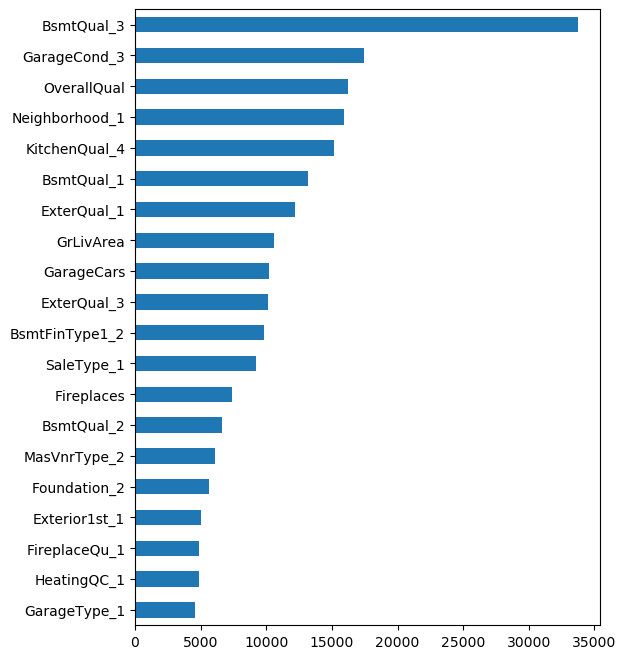

In [ ]:
# 상위 20개의 특성의 회귀계수만 시각화해보겠습니다.

ols_fs_coef.sort_values().tail(20).plot.barh(figsize=(6, 8))
plt.show()

#### Ridge
- 전체 특성을 모두 사용하여 ridge regression 모델을 만들어보겠습니다.

Ridge Regression, alpha=0.01
학습 세트 r2_score : 0.929
검증 세트 r2_score : 0.762
테스트 세트 r2_score : 0.898


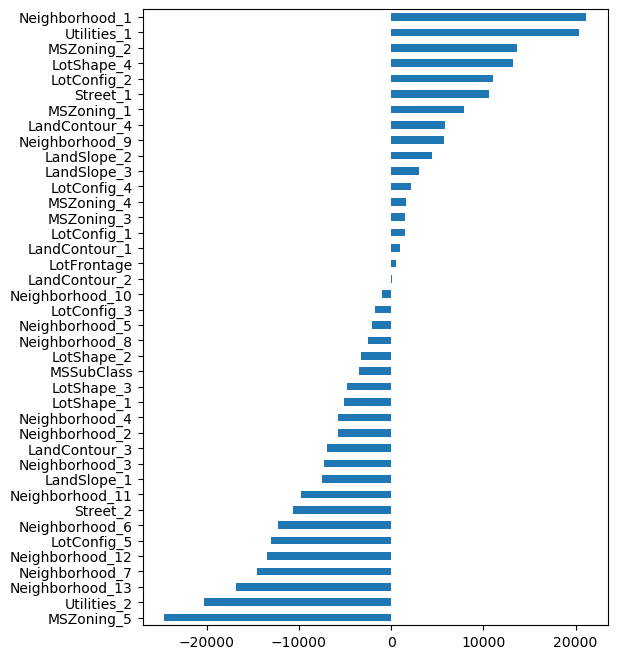

Ridge Regression, alpha=0.1
학습 세트 r2_score : 0.928
검증 세트 r2_score : 0.79
테스트 세트 r2_score : 0.896


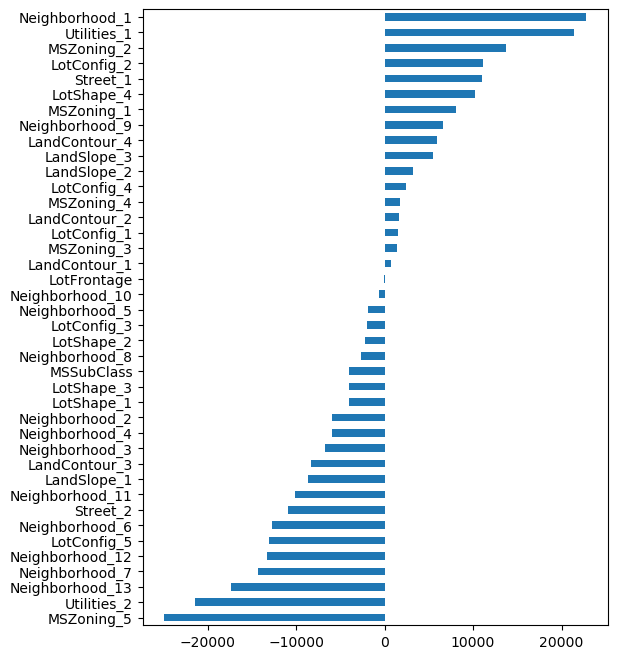

Ridge Regression, alpha=1.0
학습 세트 r2_score : 0.918
검증 세트 r2_score : 0.812
테스트 세트 r2_score : 0.888


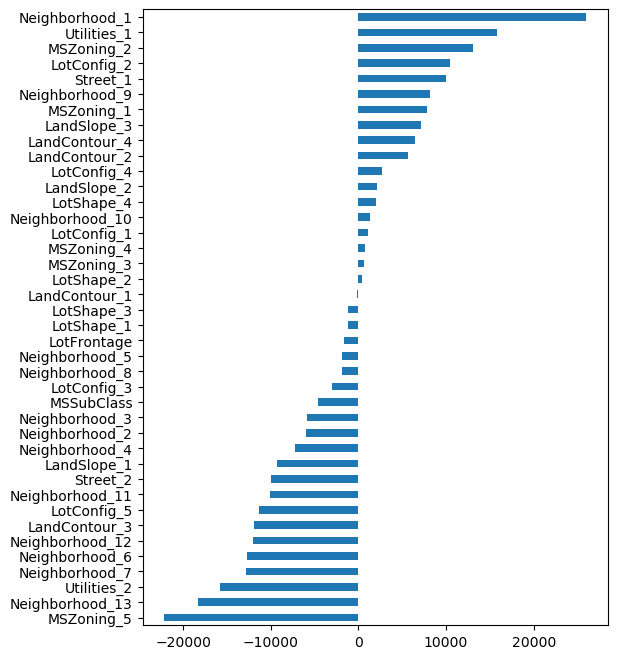

Ridge Regression, alpha=1
학습 세트 r2_score : 0.918
검증 세트 r2_score : 0.812
테스트 세트 r2_score : 0.888


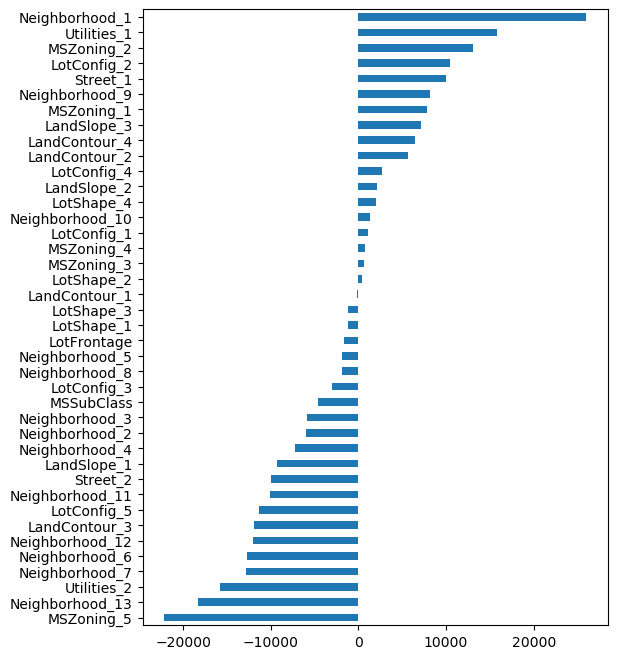

Ridge Regression, alpha=100.0
학습 세트 r2_score : 0.87
검증 세트 r2_score : 0.816
테스트 세트 r2_score : 0.872


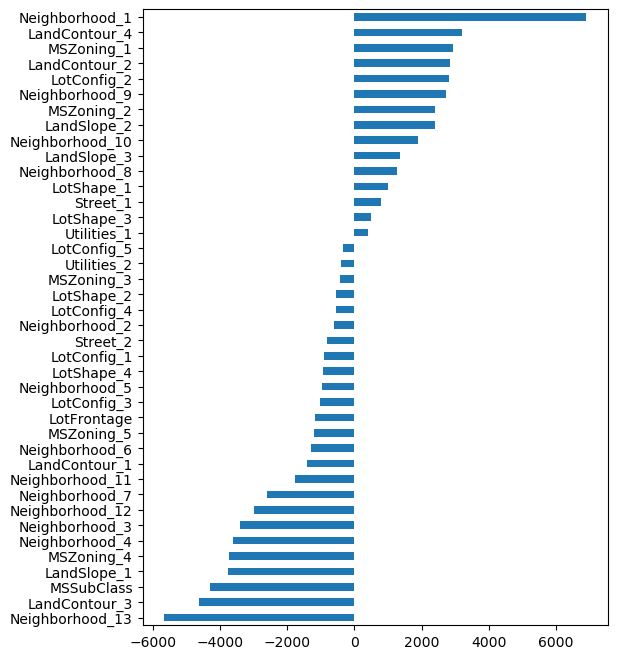

Ridge Regression, alpha=1000.0
학습 세트 r2_score : 0.814
검증 세트 r2_score : 0.777
테스트 세트 r2_score : 0.826


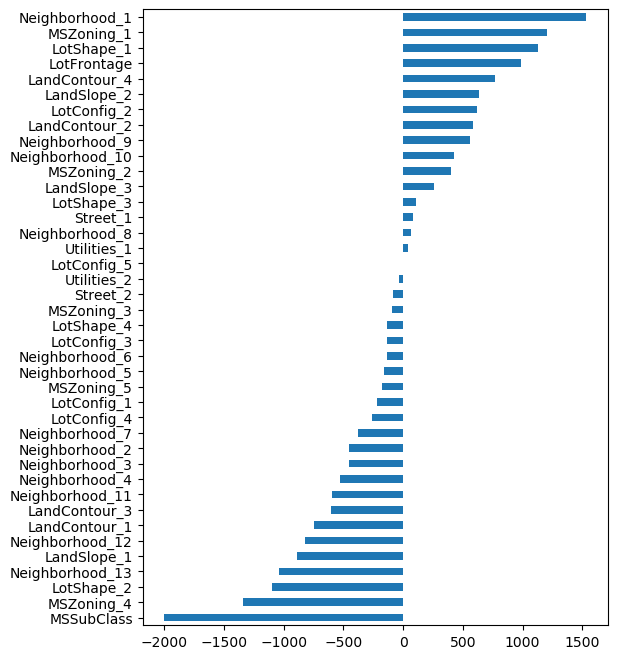

Ridge Regression, alpha=10000.0
학습 세트 r2_score : 0.568
검증 세트 r2_score : 0.473
테스트 세트 r2_score : 0.564


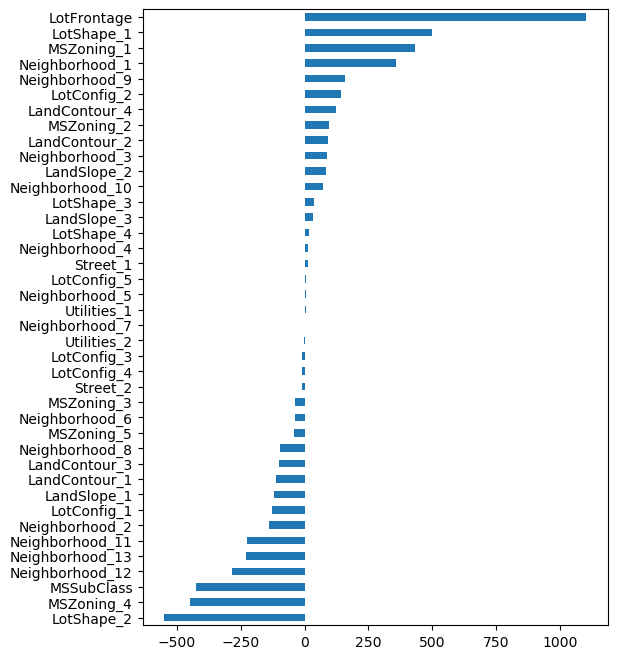

In [ ]:
"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [0.01, 0.1, 1.0, 1, 100.0, 1000.0, 10000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    ridge = Ridge(alpha=alpha)  
    ridge.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(ridge.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

패널티값이 커질수록 회귀계수가 작아지고 모델의 성능 역시 변화하는 것을 확인할 수 있습니다.

이 패널티값을 보다 효율적으로 구할 수 있는 방법이 있을까요?

[The StatQuest video answers](https://youtu.be/Q81RR3yKn30?t=602)
> So how do we decide what value to give lambda? We just try a bunch of values for lambda, and use cross-validation
typically 10-fold cross-validation, to determine which one results in the lowest variance.


sklearn에서 내장된 교차검증 알고리즘을 적용하는 [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)를 제공합니다.

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_ohe, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_val, ridge_test = print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

alpha:  21
학습 세트 r2_score : 0.893
검증 세트 r2_score : 0.821
테스트 세트 r2_score : 0.883


- 학습 세트의 성능이 0.893으로 다중선형회귀보다는 줄었지만 검증세트와 테스트세트와의 성능 차이가 많이 나지 않습니다.
- Ridge regression은 모든 특성을 사용해도 과적합을 해소할 수 있다는 것을 알 수 있습니다.

In [ ]:
ridge_coef = pd.Series(ridge.coef_, ridge.feature_names_in_)
ridge_coef.sort_values(ascending=False).head(20)

Neighborhood_1     15181.240972
OverallQual        13666.763247
Neighborhood_16    12882.439776
Neighborhood_18    12489.152592
BsmtQual_3         11739.730558
Neighborhood_14    11092.617804
Exterior1st_8       9816.921816
GrLivArea           8962.966718
BsmtExposure_5      8954.416545
KitchenQual_4       8809.847317
GarageCars          8362.818857
Condition1_1        8307.594731
Functional_1        7938.777637
BsmtFinType1_2      6331.824808
LotConfig_2         5707.578625
1stFlrSF            5660.585897
LandContour_2       5607.575097
MSZoning_2          5594.932422
Neighborhood_9      5552.113872
LandContour_4       5463.008948
dtype: float64

#### Lasso

Lasso Regression, alpha=1e-06
학습 세트 r2_score : 0.929
검증 세트 r2_score : 0.756
테스트 세트 r2_score : 0.899


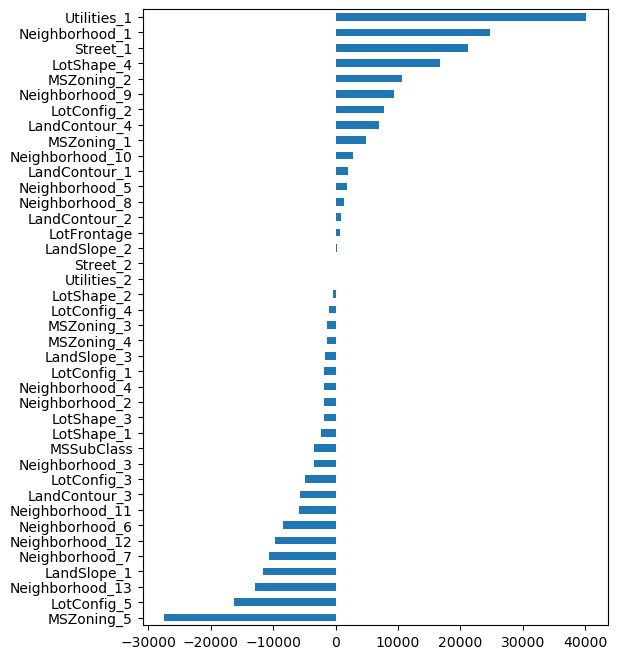

Lasso Regression, alpha=0.001
학습 세트 r2_score : 0.929
검증 세트 r2_score : 0.756
테스트 세트 r2_score : 0.9


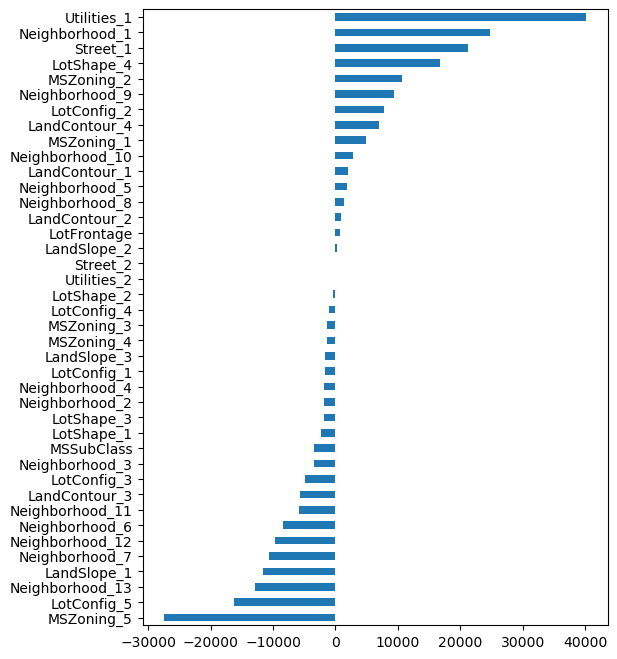

Lasso Regression, alpha=0.01
학습 세트 r2_score : 0.929
검증 세트 r2_score : 0.757
테스트 세트 r2_score : 0.9


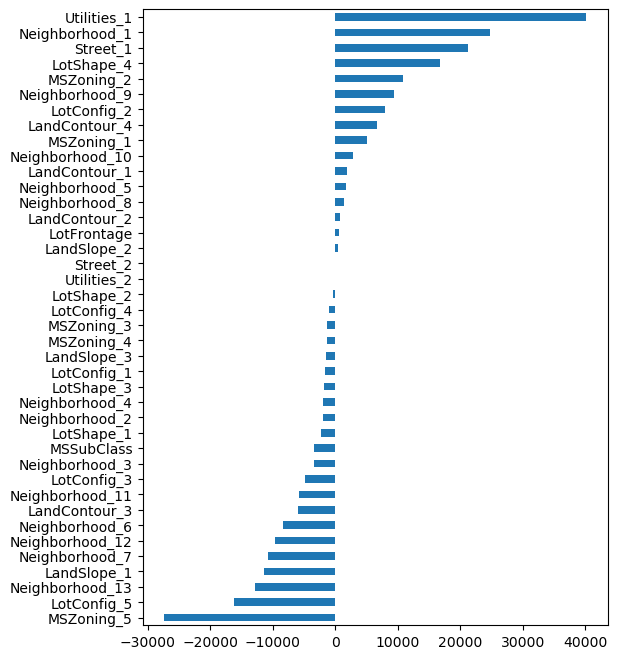

Lasso Regression, alpha=1.0
학습 세트 r2_score : 0.929
검증 세트 r2_score : 0.764
테스트 세트 r2_score : 0.904


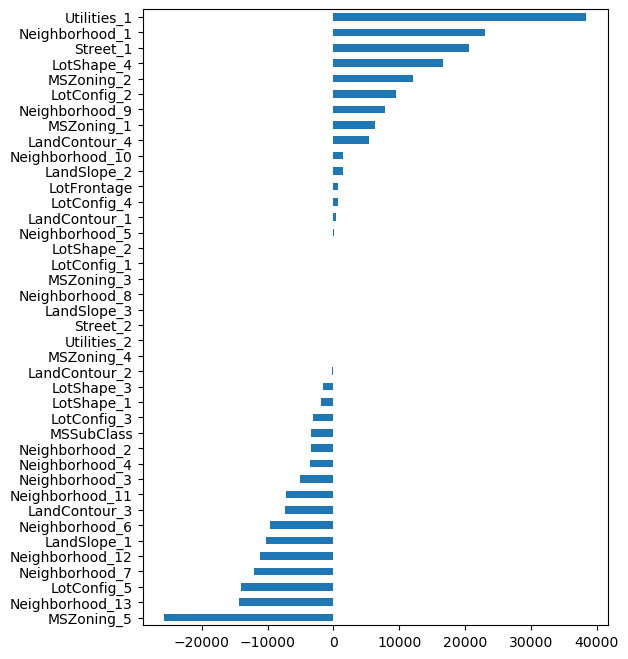

Lasso Regression, alpha=100
학습 세트 r2_score : 0.909
검증 세트 r2_score : 0.836
테스트 세트 r2_score : 0.898


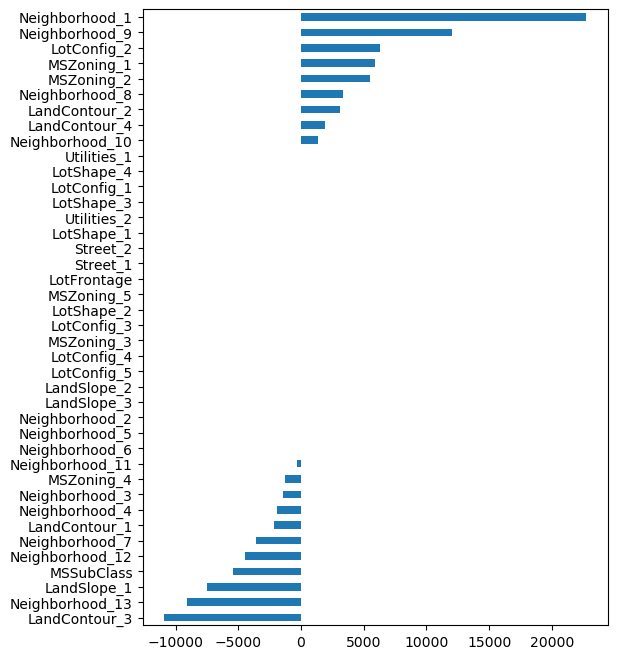

In [ ]:
"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [0.000001, 0.001, 0.01, 1.0, 100]:
        
    print(f'Lasso Regression, alpha={alpha}')

    # Ridge 모델 학습
    lasso = Lasso(alpha=alpha)  # alpha 값을 지정해줌
    lasso.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(lasso.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()


- 패널티값이 커질수록 회귀계수가 작아지고 0에 수렴하는 것을 확인할 수 있습니다.
- Lasso Regression 역시 [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)를 통해 최적의 패널티값을 찾을 수 있습니다. 

In [ ]:
from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10) # CV는 알파의 범위를 지정해줘야함 -> 최적의 alpha값을 찾기 위한 것이기 때문
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train_ohe, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_val, lasso_test = print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)


alpha:  170
학습 세트 r2_score : 0.892
검증 세트 r2_score : 0.831
테스트 세트 r2_score : 0.886


- Lasso Regression 역시 과적합이 해소된 것을 확인할 수 있습니다.

In [ ]:
print('회귀계수가 0이 아닌 특성의 수:', (lasso.coef_!=0).sum())
# 총 282개의 특성 중 84개를 제외하고는 모두 회귀계수가 0으로 수렴하였습니다. 

lasso_coef = pd.Series(lasso.coef_, ridge.feature_names_in_)
lasso_coef[lasso_coef!=0].sort_values(ascending=False)

회귀계수가 0이 아닌 특성의 수: 84


Neighborhood_16     24485.899979
Neighborhood_1      22856.188123
Neighborhood_18     21381.693064
BsmtQual_3          17781.707212
Neighborhood_14     15727.849428
                       ...      
SaleCondition_3     -7162.993530
LandSlope_1         -8566.359955
Neighborhood_13     -9526.790438
LandContour_3      -11163.345131
RoofMatl_6        -107651.913172
Length: 84, dtype: float64

### 다중선형회귀, Ridge, Lasso의 결과를 비교해보겠습니다

#### 성능비교
- OLS가 과적합이 심했던 것에 비해 Ridge와 Lasso는 과적합이 해소된 것을 알 수 있습니다. 
- 테스트 세트에서 가장 성능이 좋은 모델은 Lasso Regression입니다.
    - 지금처럼 사용되는 많은 특성 중 예측에 쓰이는 특성이 몇개 뿐이라고 의심될 때는 불필요한 특성의 회귀계수를 0으로 만들어 확실한 특성선택의 효과를 가져오는 Lasso가 더 좋은 성능을 보일 수 있습니다.

> 그렇다면 언제 Ridge를 쓰고 언제 Lasso를 사용하는 것이 좋을까요? 생각해보세요.

In [ ]:
eval_compare = pd.DataFrame(index = ['train', 'CV', 'Test'], data = {'OLS':[ols_train, ols_val, ols_test], 'Ridge':[ridge_train, ridge_val, ridge_test], 'Lasso':[lasso_train, lasso_val, lasso_test]})
eval_compare

,OLS,Ridge,Lasso
train,9.290000e-01,0.893,0.892
CV,-7.764612e+19,0.821,0.831
Test,-8.266405e+17,0.883,0.886


#### 회귀계수 비교

In [ ]:
compare = pd.concat([ols_coef, ridge_coef, lasso_coef], axis=1)
compare.columns = ['OLS', 'Ridge', 'Lasso']

In [ ]:
idx = np.abs(compare.OLS).head(30).index
compare.loc[idx].sort_values(by='Lasso')


,OLS,Ridge,Lasso
LandContour_3,6.905556e+15,-10154.354118,-11163.345131
LandSlope_1,-2.249815e+15,-5831.394838,-8566.359955
MSSubClass,-3.495433e+03,-4627.221278,-6134.444527
MSZoning_4,1.294755e+16,-4202.442981,-4594.782796
LandContour_1,6.905556e+15,-916.229927,-1718.479195
LotFrontage,6.434102e+02,-1940.130499,-553.842779
Neighborhood_3,4.369613e+14,-5996.669157,-103.499541
Street_1,2.064383e+16,2956.627350,0.000000
LandSlope_3,-2.249815e+15,2845.404027,0.000000
LandSlope_2,-2.249815e+15,2985.990811,0.000000


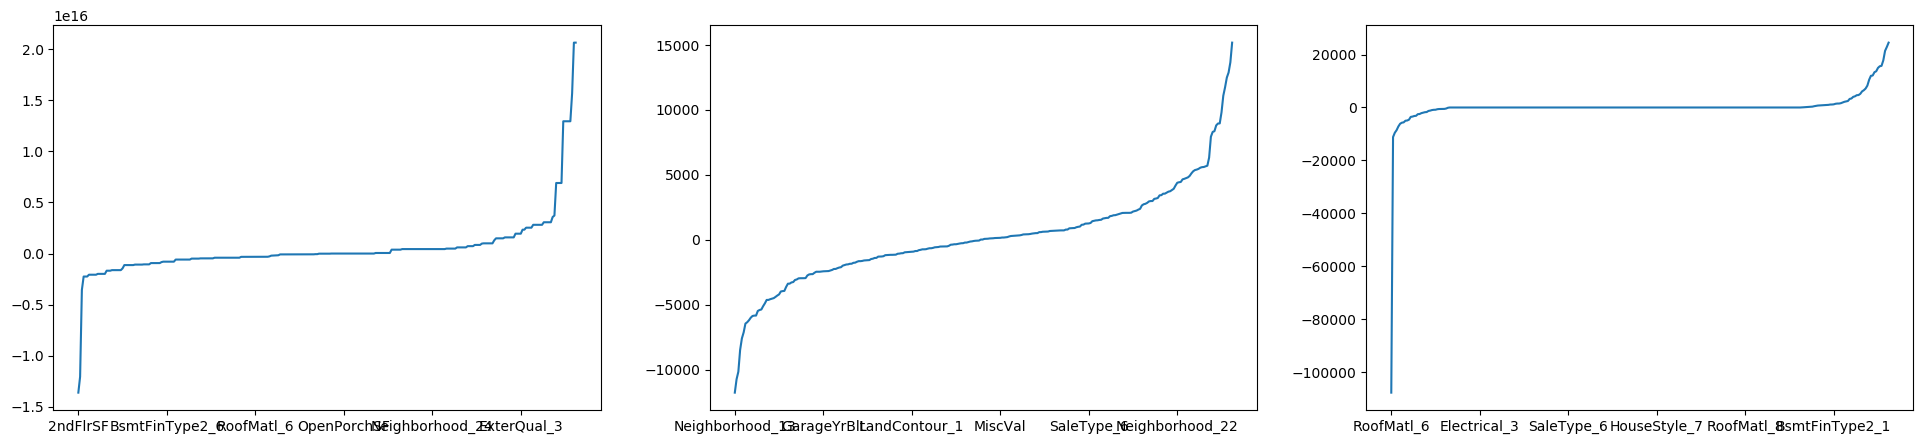

In [ ]:
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(131)
compare.OLS.sort_values().plot(ax=ax)

ax1 = fig.add_subplot(132)
compare.Ridge.sort_values().plot(ax=ax1)

ax2 = fig.add_subplot(133)
compare.Lasso.sort_values().plot(ax=ax2)
plt.show()

OLS, Ridge, Lasso의 회귀계수를 비교해보면
- OLS에 비해 정규화 모델의 회귀계수의 값이 많이 줄어든 것을 확인할 수 있습니다. 
    - 이처럼 정규화 모델은 정규화를 통해 특이값으로 인한 과도한 기울기를 보정해줍니다. 
- 정규화 모델은 몇몇 중요한 특성들만 회귀계수가 크고 대부분 0 근처에 있음을 볼 수 있습니다.
    - 영향력이 낮은 특성의 회귀계수의 값을 감소시켜 특성선택 효과를 가져옵니다.
    - 특히 Lasso는 중요하지 않은 특성의 회귀계수가 0으로 변환된 것을 알 수 있습니다. 


### 마지막으로 성능이 가장 좋았던 Lasso를 이용해 최종 모델을 만들어 보도록 하겠습니다.

최종 모델을 만들기 위해서는 가지고 있는 데이터를 다 사용해 최적의 모델을 만들어야 합니다.
- train set와 test set를 더한 뒤 위에서 만든 Lasso 모델에 넣어 다시 학습을 진행합니다. 

In [ ]:
# train set와 test set를 concat 합니다. 
X_total = pd.concat([X_train_ohe, X_test_ohe])
y_total = pd.concat([y_train, y_test])

In [ ]:
# 위에서 만든 lasso 모델에 모든 데이터를 넣어 최종 모델을 만듭니다.

lasso.fit(X_total, y_total)
lasso_final_coef = lasso.coef_


print(f'alpha: {lasso.alpha_}')
print(f'cv best score: {lasso.score(X_total, y_total)}')

alpha: 120
cv best score: 0.9032129065764402


lasso 회귀계수 최대값 : 28069.45005630707
 lasso 회귀계수 평균 : -127.41269366461631
회귀계수가 0이 아닌 특성의 수 : 97


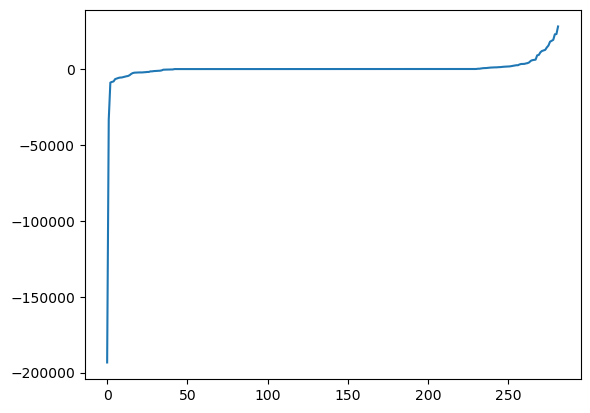

In [ ]:
# 회귀계수를 확인해보겠습니다. 
print(f'lasso 회귀계수 최대값 : {lasso_final_coef.max()}\n lasso 회귀계수 평균 : {lasso_final_coef.mean()}')
print(f'회귀계수가 0이 아닌 특성의 수 : {(lasso_final_coef!=0).sum()}')
lasso_final_coef.sort()
plt.plot(lasso_final_coef)
plt.show()

## 👏 마무리
#### 이번 노트에서는 
- 과적합을 해소하기 위한 방법으로 정규화 모델을 배웠습니다. 
- 정규화 모델 중 Ridge와 Lasso 회귀의 특징과 구현방법에 대해 학습하였습니다.
<br></br>

#### 학습 후 아래 질문에 답해보세요
1. 과적합을 해소하기 위한 방법으로 무엇이 있나요?
2. 정규화(Regularization)란 무엇인가요?
3. Ridge Regression과 Lasso Regression의 차이는 무엇인가요?
    - 각각은 어떤 패널티가 부과되나요?
    - 각각의 특징은 무엇인가요?
4. 람다(알파, 패널티)란 무엇인가요?
5. scikit-learn에서 최적의 알파값은 어떻게 찾을 수 있나요?

## 참고자료

- [Regularization: Ridge Regression and the LASSO](http://zhanxw.com/blog/wp-content/uploads/2013/09/Rudyregularization.pdf)

#### 도서
- The Elements of Statistical Learning
- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow



